In [1]:
print("GET ON WiTH FUNKOT")
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
import mglearn

GET ON WiTH FUNKOT


In [2]:
X = np.array([[0,1,0,1],
              [1,0,1,1],
              [0,0,0,1],
              [1,0,1,0]])
y = np.array([0,1,0,1])
counts = {}
for label in np.unique(y):
    print("label: {}".format(label))
    print("y == label: {}".format(y == label))
    print("True & True: {}".format(True&True))
    print("X[y == label]:\n {}".format(X[y == label]))
    #这是一种布尔索引
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

label: 0
y == label: [ True False  True False]
True & True: True
X[y == label]:
 [[0 1 0 1]
 [0 0 0 1]]
label: 1
y == label: [False  True False  True]
True & True: True
X[y == label]:
 [[1 0 1 1]
 [1 0 1 0]]
Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [3]:
#决策树
#由于无法import graphbiz，可视化失败
mglearn.plots.plot_animal_tree()

ModuleNotFoundError: No module named 'graphviz'

In [9]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [10]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [11]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","benign"],
                feature_names=cancer.feature_names, =False,filled=True)

SyntaxError: invalid syntax (3742784324.py, line 3)

In [12]:
import graphbiz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphbiz'

In [13]:
#输出特征重要性
print("Feature importances:\n{}".format(tree.feature_importances_))


Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


n: 30


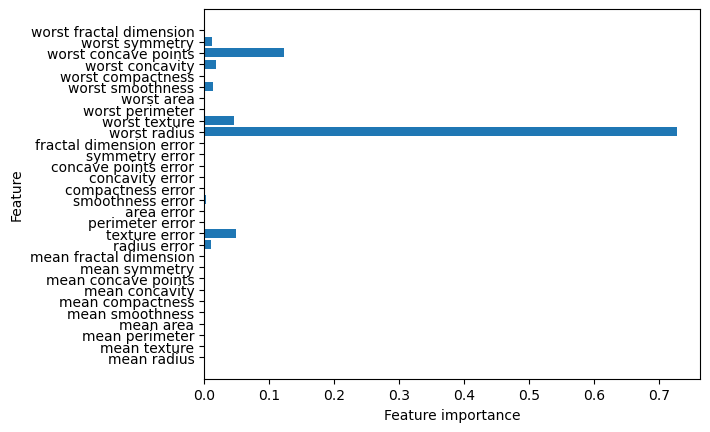

In [14]:
#特征重要性可视化函数
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    print("n: {}".format(n_features))
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

In [15]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

ModuleNotFoundError: No module named 'graphviz'

Text(0, 0.5, 'Price in $/Mbyte')

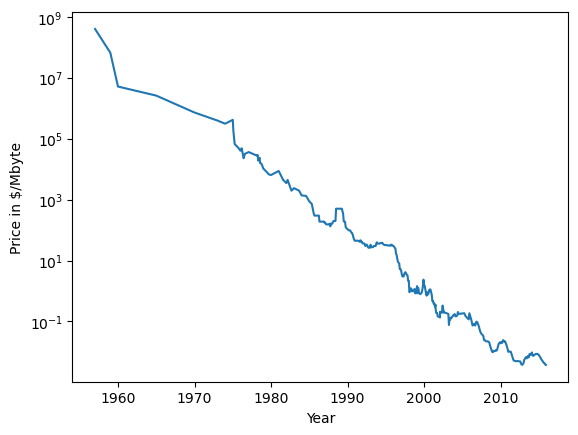

In [16]:
#数据下载地址：https://github.com/amueller/introduction_to_ml_with_python/blob/master/data/ram_price.csv
ram_prices = pd.read_csv("ram_price.csv")
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [17]:
#决策树回归与线性回归的对比
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:,np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

X_all = ram_prices.date[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

C:\Users\zzdus\AppData\Local\Temp\ipykernel_8076\3980089970.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:,np.newaxis]
C:\Users\zzdus\AppData\Local\Temp\ipykernel_8076\3980089970.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:,np.newaxis]


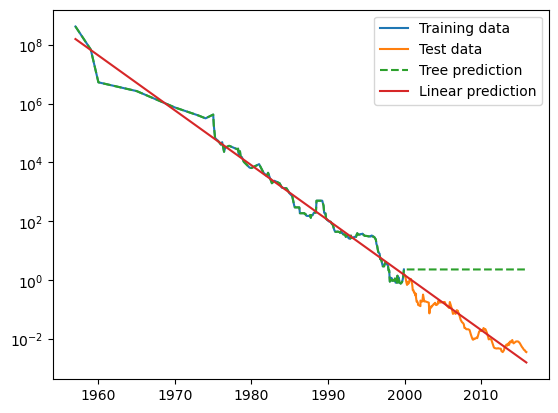

In [18]:
plt.semilogy(data_train.date,data_train.price,label="Training data")
plt.semilogy(data_test.date,data_test.price,label="Test data")
plt.semilogy(ram_prices.date,price_tree,'--',label="Tree prediction")
plt.semilogy(ram_prices.date,price_lr,label="Linear prediction")
plt.legend()

In [19]:
#决策树集成
#随机森林例图
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

forest = RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

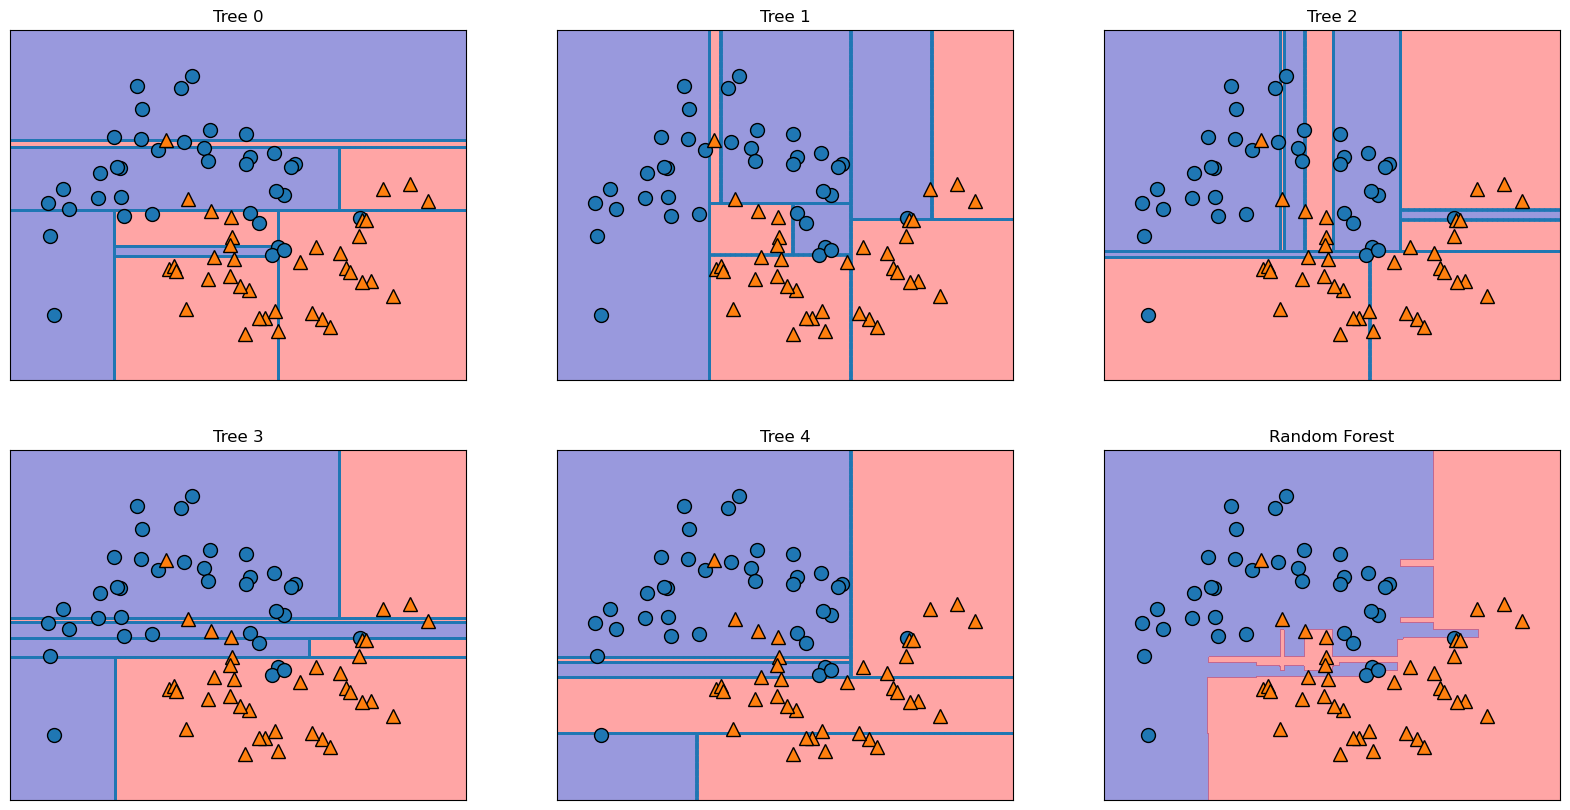

In [20]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

In [21]:
#随机森林应用
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


n: 30


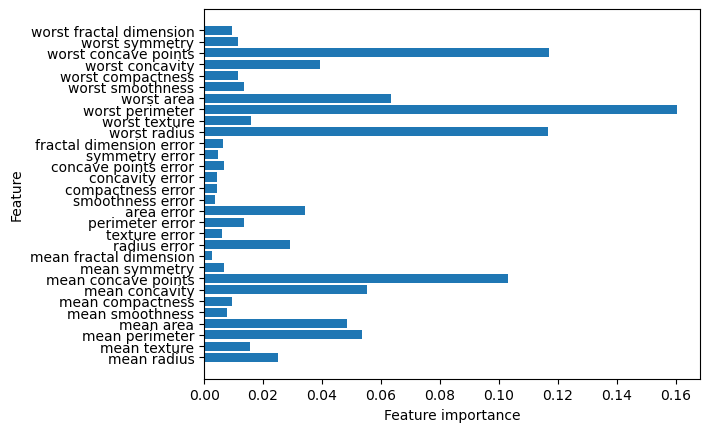

In [22]:
#随机森林的特征重要性可视化
plot_feature_importances_cancer(forest)

In [24]:
#梯度提升回归树 梯度提升机
#示例：乳腺癌数据集
from sklearn.ensemble import GradientBoostingClassifier

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test,y_test)))
#可能存在过拟合

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [25]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [26]:
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


n: 30


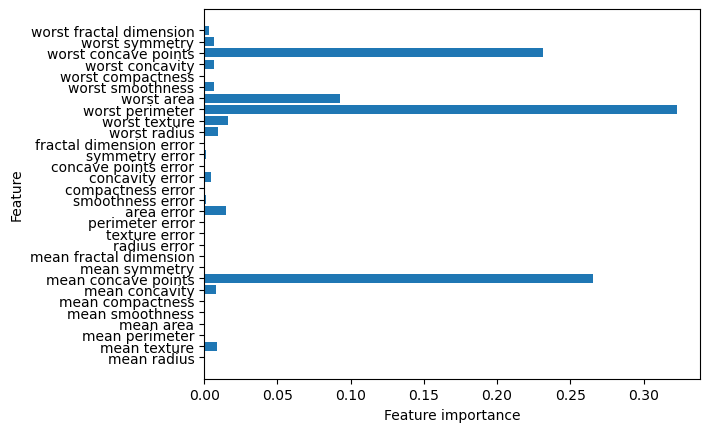

In [27]:
#可视化特征重要性
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)
plot_feature_importances_cancer(gbrt)

In [ ]:
#对于大规模问题，可以用xgboost包